# Naive Bayes Model

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("kidney_Disease_Pre_processed.csv")
df.head(20)

,Unnamed: 0,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,0,48,80,1.020,1,0,0,0,1,1,...,44,7800,5.2,0,0,1,1,1,1,0
1,1,7,50,1.020,4,0,0,0,1,1,...,38,6000,0.0,1,1,1,1,1,1,0
2,2,62,80,1.010,2,3,0,0,1,1,...,31,7500,0.0,1,0,1,0,1,0,0
3,3,48,70,1.005,4,0,0,1,0,1,...,32,6700,3.9,0,1,1,0,0,0,0
4,4,51,80,1.010,2,0,0,0,1,1,...,35,7300,4.6,1,1,1,1,1,1,0
5,5,60,90,1.015,3,0,0,0,1,1,...,39,7800,4.4,0,0,1,1,0,1,0
6,6,68,70,1.010,0,0,0,0,1,1,...,36,0,0.0,1,1,1,1,1,1,0
7,7,24,80,1.015,2,4,0,1,1,1,...,44,6900,5.0,1,0,1,1,0,1,0
8,8,52,100,1.015,3,0,0,1,0,1,...,33,9600,4.0,0,0,1,1,1,0,0
9,9,53,90,1.020,2,0,1,1,0,1,...,29,12100,3.7,0,0,1,0,1,0,0


In [2]:
x = df.drop('class',axis='columns')
y = df['class']
x

,Unnamed: 0,age,bp,sg,al,su,rbc,pc,pcc,ba,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,0,48,80,1.020,1,0,0,0,1,1,...,15.4,44,7800,5.2,0,0,1,1,1,1
1,1,7,50,1.020,4,0,0,0,1,1,...,11.3,38,6000,0.0,1,1,1,1,1,1
2,2,62,80,1.010,2,3,0,0,1,1,...,9.6,31,7500,0.0,1,0,1,0,1,0
3,3,48,70,1.005,4,0,0,1,0,1,...,11.2,32,6700,3.9,0,1,1,0,0,0
4,4,51,80,1.010,2,0,0,0,1,1,...,11.6,35,7300,4.6,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55,80,1.020,0,0,0,0,1,1,...,15.7,47,6700,4.9,1,1,1,1,1,1
396,396,42,70,1.025,0,0,0,0,1,1,...,16.5,54,7800,6.2,1,1,1,1,1,1
397,397,12,80,1.020,0,0,0,0,1,1,...,15.8,49,6600,5.4,1,1,1,1,1,1
398,398,17,60,1.025,0,0,0,0,1,1,...,14.2,51,7200,5.9,1,1,1,1,1,1


In [3]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 400, dtype: int64

# Train and Predict

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [5]:
df.columns[df.isna().any()]

Index([], dtype='object')

In [6]:
len(x_train)

320

In [7]:
len(x_test)

80

In [8]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [9]:
model.fit(x_train,y_train)

GaussianNB()

In [10]:
model.score(x_test,y_test)

1.0

In [11]:
y_test[:10]

285    1
153    0
276    1
278    1
269    1
296    1
112    0
261    1
293    1
382    1
Name: class, dtype: int64

In [12]:
model.predict(x_test[:10])

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1])

# GridSearchCV for Naive Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer


model = GaussianNB()

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

# params_NB = {
#     "priors":[0.2,0.9] ,
#     "var_smoothing": np.logspace(0,-9, num=100)
# }



#cv_scores = cross_val_score(model, X, Y, cv=5)

gridcv_NB = GridSearchCV(estimator=model, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')


Data_transformed = PowerTransformer().fit_transform(x_test)

gridcv_NB.fit(Data_transformed, y_test);


Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [14]:
gridcv_NB.best_params_


{'var_smoothing': 0.15199110829529336}

In [15]:
gridcv_NB.best_score_


0.9625

# Exhaustive Grid Search CV for SVC

In [16]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    "gamma": [0.1, 1.0, 10, 100],
    "C": [0.1,1.0,10,100],
    "kernel": ['rbf','linear']
}

clf = GridSearchCV(SVC(), param_grid, cv=5, verbose=2 )
clf.fit(x_train,y_train)
clf.cv_results_

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.2s
[CV] END .......................C=0.1, gamma=1.0, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=1.

[CV] END ......................C=10, gamma=10, kernel=linear; total time=   0.1s
[CV] END ......................C=10, gamma=10, kernel=linear; total time=   0.1s
[CV] END ......................C=10, gamma=10, kernel=linear; total time=   0.0s
[CV] END ......................C=10, gamma=10, kernel=linear; total time=   0.3s
[CV] END ........................C=10, gamma=100, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=100, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=100, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=100, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=100, kernel=rbf; total time=   0.0s
[CV] END .....................C=10, gamma=100, kernel=linear; total time=   0.1s
[CV] END .....................C=10, gamma=100, kernel=linear; total time=   0.1s
[CV] END .....................C=10, gamma=100, kernel=linear; total time=   0.1s
[CV] END ...................

{'mean_fit_time': array([0.01614704, 0.10158911, 0.01144619, 0.10611792, 0.01102495,
        0.1021349 , 0.01316104, 0.10740871, 0.0120523 , 0.10365081,
        0.01317625, 0.10523911, 0.01488404, 0.11263928, 0.01454859,
        0.0991303 , 0.01254749, 0.09678307, 0.01196098, 0.09590144,
        0.01147089, 0.10674467, 0.01262498, 0.09417763, 0.01170502,
        0.10281386, 0.01113286, 0.10554075, 0.01599679, 0.1008595 ,
        0.0133285 , 0.10307012]),
 'std_fit_time': array([0.00328941, 0.06938765, 0.00080209, 0.0807196 , 0.00108246,
        0.08103309, 0.0014213 , 0.08006419, 0.00124863, 0.07803355,
        0.00155956, 0.08093589, 0.00278291, 0.08555697, 0.00224651,
        0.06834594, 0.00083419, 0.0699122 , 0.00124603, 0.07049458,
        0.00059201, 0.08413802, 0.00114689, 0.06971941, 0.00086063,
        0.06801794, 0.00017657, 0.09156757, 0.00088038, 0.06901287,
        0.00045244, 0.07660224]),
 'mean_score_time': array([0.00754418, 0.00393376, 0.00582585, 0.00411282, 0.005342

In [17]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016147,0.003289,0.007544,0.001936,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.640625,0.640625,0.640625,0.640625,0.640625,0.640625,0.0,17
1,0.101589,0.069388,0.003934,0.000990,0.1,0.1,linear,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1
2,0.011446,0.000802,0.005826,0.000750,0.1,1.0,rbf,"{'C': 0.1, 'gamma': 1.0, 'kernel': 'rbf'}",0.640625,0.640625,0.640625,0.640625,0.640625,0.640625,0.0,17
3,0.106118,0.080720,0.004113,0.000338,0.1,1.0,linear,"{'C': 0.1, 'gamma': 1.0, 'kernel': 'linear'}",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1
4,0.011025,0.001082,0.005342,0.000637,0.1,10,rbf,"{'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}",0.640625,0.640625,0.640625,0.640625,0.640625,0.640625,0.0,17
5,0.102135,0.081033,0.003875,0.001046,0.1,10,linear,"{'C': 0.1, 'gamma': 10, 'kernel': 'linear'}",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1
6,0.013161,0.001421,0.006277,0.001680,0.1,100,rbf,"{'C': 0.1, 'gamma': 100, 'kernel': 'rbf'}",0.640625,0.640625,0.640625,0.640625,0.640625,0.640625,0.0,17
7,0.107409,0.080064,0.003799,0.000497,0.1,100,linear,"{'C': 0.1, 'gamma': 100, 'kernel': 'linear'}",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1
8,0.012052,0.001249,0.005503,0.000448,1.0,0.1,rbf,"{'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}",0.640625,0.640625,0.640625,0.640625,0.640625,0.640625,0.0,17
9,0.103651,0.078034,0.003919,0.000542,1.0,0.1,linear,"{'C': 1.0, 'gamma': 0.1, 'kernel': 'linear'}",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1


In [18]:
df[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,0.1,rbf,0.640625
1,0.1,linear,1.000000
2,0.1,rbf,0.640625
3,0.1,linear,1.000000
4,0.1,rbf,0.640625
5,0.1,linear,1.000000
6,0.1,rbf,0.640625
7,0.1,linear,1.000000
8,1.0,rbf,0.640625
9,1.0,linear,1.000000


In [19]:

print("Best params:",clf.best_params_)

print("Best score:",clf.best_score_)

print("Best score for train:",clf.score(x_train, y_train))

print("Best score test:",clf.score(x_test, y_test))


Best params: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Best score: 1.0
Best score for train: 1.0
Best score test: 1.0


In [20]:
clf.best_params_


{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [21]:
clf.best_score_

1.0

In [22]:
clf.score(x_train, y_train)

1.0

In [23]:
clf.score(x_test, y_test)

1.0

In [24]:

print("Best params:",clf.best_params_)

print("Best score:",clf.best_score_)

print("Best score for train:",clf.score(x_train, y_train))

print("Best score test:",clf.score(x_test, y_test))


Best params: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Best score: 1.0
Best score for train: 1.0
Best score test: 1.0


# Randomized Hyperparameter Search for SVC

In [25]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler(),
    SVC()
)

In [26]:

param_grid = {
    "svc__gamma": [0.1, 1.0, 10, 100],
    "svc__C": [0.1, 1.0, 10, 100],
}

In [27]:
from sklearn.model_selection import RandomizedSearchCV


random_search = RandomizedSearchCV(pipe, param_grid, cv=5, n_iter=5)
random_search.fit(x_train, y_train);

In [28]:
random_search.score(x_test, y_test)

0.95

In [29]:
clf.score(x_test, y_test)

1.0

In [30]:
random_search.score(x_train, y_train)

1.0

# AdaBoost Classifier

In [31]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

adaclf = AdaBoostClassifier(n_estimators=70, learning_rate=.6, random_state=0)
model = adaclf.fit(x_train,y_train)


y_pred = model.predict(x_train)
print("Accuracy of train: ",accuracy_score(y_train, y_pred))

y_pred = model.predict(x_test)
print("Accuracy of test: ",accuracy_score(y_test, y_pred))



Accuracy of train:  1.0
Accuracy of test:  1.0


# Adaboost with SVC base estimator

In [32]:
# base_estimator is the learning algorithm to use to train the weak models. 
# This will almost always not needed to be changed because by far the most common learner to use 
# with AdaBoost is a decision tree – this parameter’s default argument.

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

svc=SVC(probability=True, kernel='linear')

ada2=AdaBoostClassifier(n_estimators=50, base_estimator=svc, learning_rate=.1, random_state=0)
model2 = ada2.fit(x_train,y_train)


y_pred = model2.predict(x_train)
print("Accuracy of train: ",accuracy_score(y_train, y_pred))

y_pred = model2.predict(x_test)
print("Accuracy of test: ",accuracy_score(y_test, y_pred))



Accuracy of train:  1.0
Accuracy of test:  1.0


#  AdaBoost with SVC Grid Search

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

svc=SVC(probability=True, kernel='linear')

ada_model = AdaBoostClassifier(base_estimator=svc)


parameters = {
    'n_estimators':[10,50,250,1000],
    'learning_rate':[0.01,0.1,0.15,0.2],
    #'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20],
    #'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
    #'algorithm': ['SAMME', 'SAMME.R']
}

ada_grid_search = GridSearchCV(ada_model, parameters,scoring='accuracy',n_jobs=-1)
ada_grid_search.fit(x_train,y_train)


GridSearchCV(estimator=AdaBoostClassifier(base_estimator=SVC(kernel='linear',
                                                             probability=True)),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.15, 0.2],
                         'n_estimators': [10, 50, 250, 1000]},
             scoring='accuracy')

In [34]:
print("Best params:",ada_grid_search.best_params_)

print("Best score:",ada_grid_search.best_score_)

print("Best score for train:",ada_grid_search.score(x_train, y_train))

print("Best test:",ada_grid_search.score(x_test, y_test))


Best params: {'learning_rate': 0.01, 'n_estimators': 10}
Best score: 1.0
Best score for train: 1.0
Best test: 1.0


# AdaBoost Classifier with Decision Tree base estimator and GridSearchCV

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV


ada_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

parameters = {
    'base_estimator__max_depth':[i for i in range(2,11,2)],
    'base_estimator__min_samples_leaf':[5,10],
    'n_estimators':[10,50,250,1000],
    'learning_rate':[0.01,0.1,0.15,0.2],
    #'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20],
    #'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
    #'algorithm': ['SAMME', 'SAMME.R']
}

ada_grid_searchdt = GridSearchCV(ada_model, parameters,scoring='accuracy',n_jobs=-1)
ada_grid_searchdt.fit(x_train,y_train)


GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'base_estimator__max_depth': [2, 4, 6, 8, 10],
                         'base_estimator__min_samples_leaf': [5, 10],
                         'learning_rate': [0.01, 0.1, 0.15, 0.2],
                         'n_estimators': [10, 50, 250, 1000]},
             scoring='accuracy')

In [37]:
print("Best params:",ada_grid_search.best_params_)

print("Best score:",ada_grid_search.best_score_)

print("Best score for train:",ada_grid_search.score(x_train, y_train))

print("Best test:",ada_grid_search.score(x_test, y_test))


Best params: {'learning_rate': 0.01, 'n_estimators': 10}
Best score: 1.0
Best score for train: 1.0
Best test: 1.0


#  AdaBoost with Naive Bayes and Grid Search

In [38]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# model = GaussianNB()

ada_model = AdaBoostClassifier(base_estimator=GaussianNB())

parameters = {
    'n_estimators':[10,50,250,1000],
    'learning_rate':[0.01,0.1,0.15,0.2]
}

ada_grid_search = GridSearchCV(ada_model, parameters,verbose=3,scoring='accuracy',n_jobs=-1)
ada_grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=AdaBoostClassifier(base_estimator=GaussianNB()),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.15, 0.2],
                         'n_estimators': [10, 50, 250, 1000]},
             scoring='accuracy', verbose=3)

In [39]:
print("Best params:",ada_grid_search.best_params_)

print("Best score:",ada_grid_search.best_score_)

print("Best score for train:",ada_grid_search.score(x_train, y_train))

print("Best test:",ada_grid_search.score(x_test, y_test))


Best params: {'learning_rate': 0.2, 'n_estimators': 10}
Best score: 0.996875
Best score for train: 0.99375
Best test: 1.0


# Confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix
y_pre=ada_grid_searchdt.predict(x_test)
cm = confusion_matrix(y_test, y_pre)
cm

array([[45,  0],
       [ 0, 35]])

Text(70.72222222222221, 0.5, 'Truth')

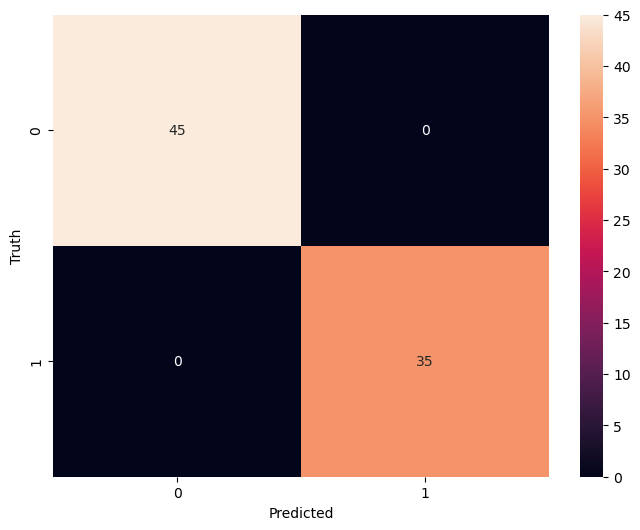

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(8,6))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')